In [12]:
import numpy as np 
import pandas as pd 
import warnings
import matplotlib.pyplot as plt 
%matplotlib inline

warnings.simplefilter('ignore')

In [16]:
# Distribution graphs (histogram/bar graph) of column data
def plot_per_column_dist(df, n_graph_shown, n_graph_per_row):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    n_rows, n_cols = df.shape
    column_names = list(df)
    n_graph_row = (n_cols + n_graph_per_row - 1) / n_graph_per_row
    plt.figure(num = None, figsize = (6 * n_graph_per_row, 8 * n_graph_row), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(n_cols, n_graph_shown)):
        plt.subplot(n_graph_row, n_graph_per_row, i + 1)
        columns_df = df.iloc[:, i]
        if (not np.issubdtype(type(columns_df.iloc[0]), np.number)):
            valueCounts = columns_df.value_counts()
            valueCounts.plot.bar()
        else:
            columns_df.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{column_names[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [2]:
# Correlation matrix
def plot_corr_mat(df, graph_width):
    file_name = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graph_width, graph_width), dpi=80, facecolor='w', edgecolor='k')
    corr_matrix = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corr_matrix)
    plt.title(f'Correlation Matrix for {file_name}', fontsize=15)
    plt.show()

In [3]:
# Scatter and density plots
def plot_scatter_mat(df, plot_size, text_size):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    ## dropping null values
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    column_names = list(df)
    if len(column_names) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        column_names = column_names[:10]
    df = df[column_names]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plot_size, plot_size], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=text_size)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [10]:
''' reading dataset '''
df = pd.read_csv('Tweets.csv')
df.dataframeName = 'Tweets.csv'

In [5]:
''' display data '''
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
''' shape of data '''
df.shape

(14640, 15)

In [7]:
''' checking null values in data '''
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

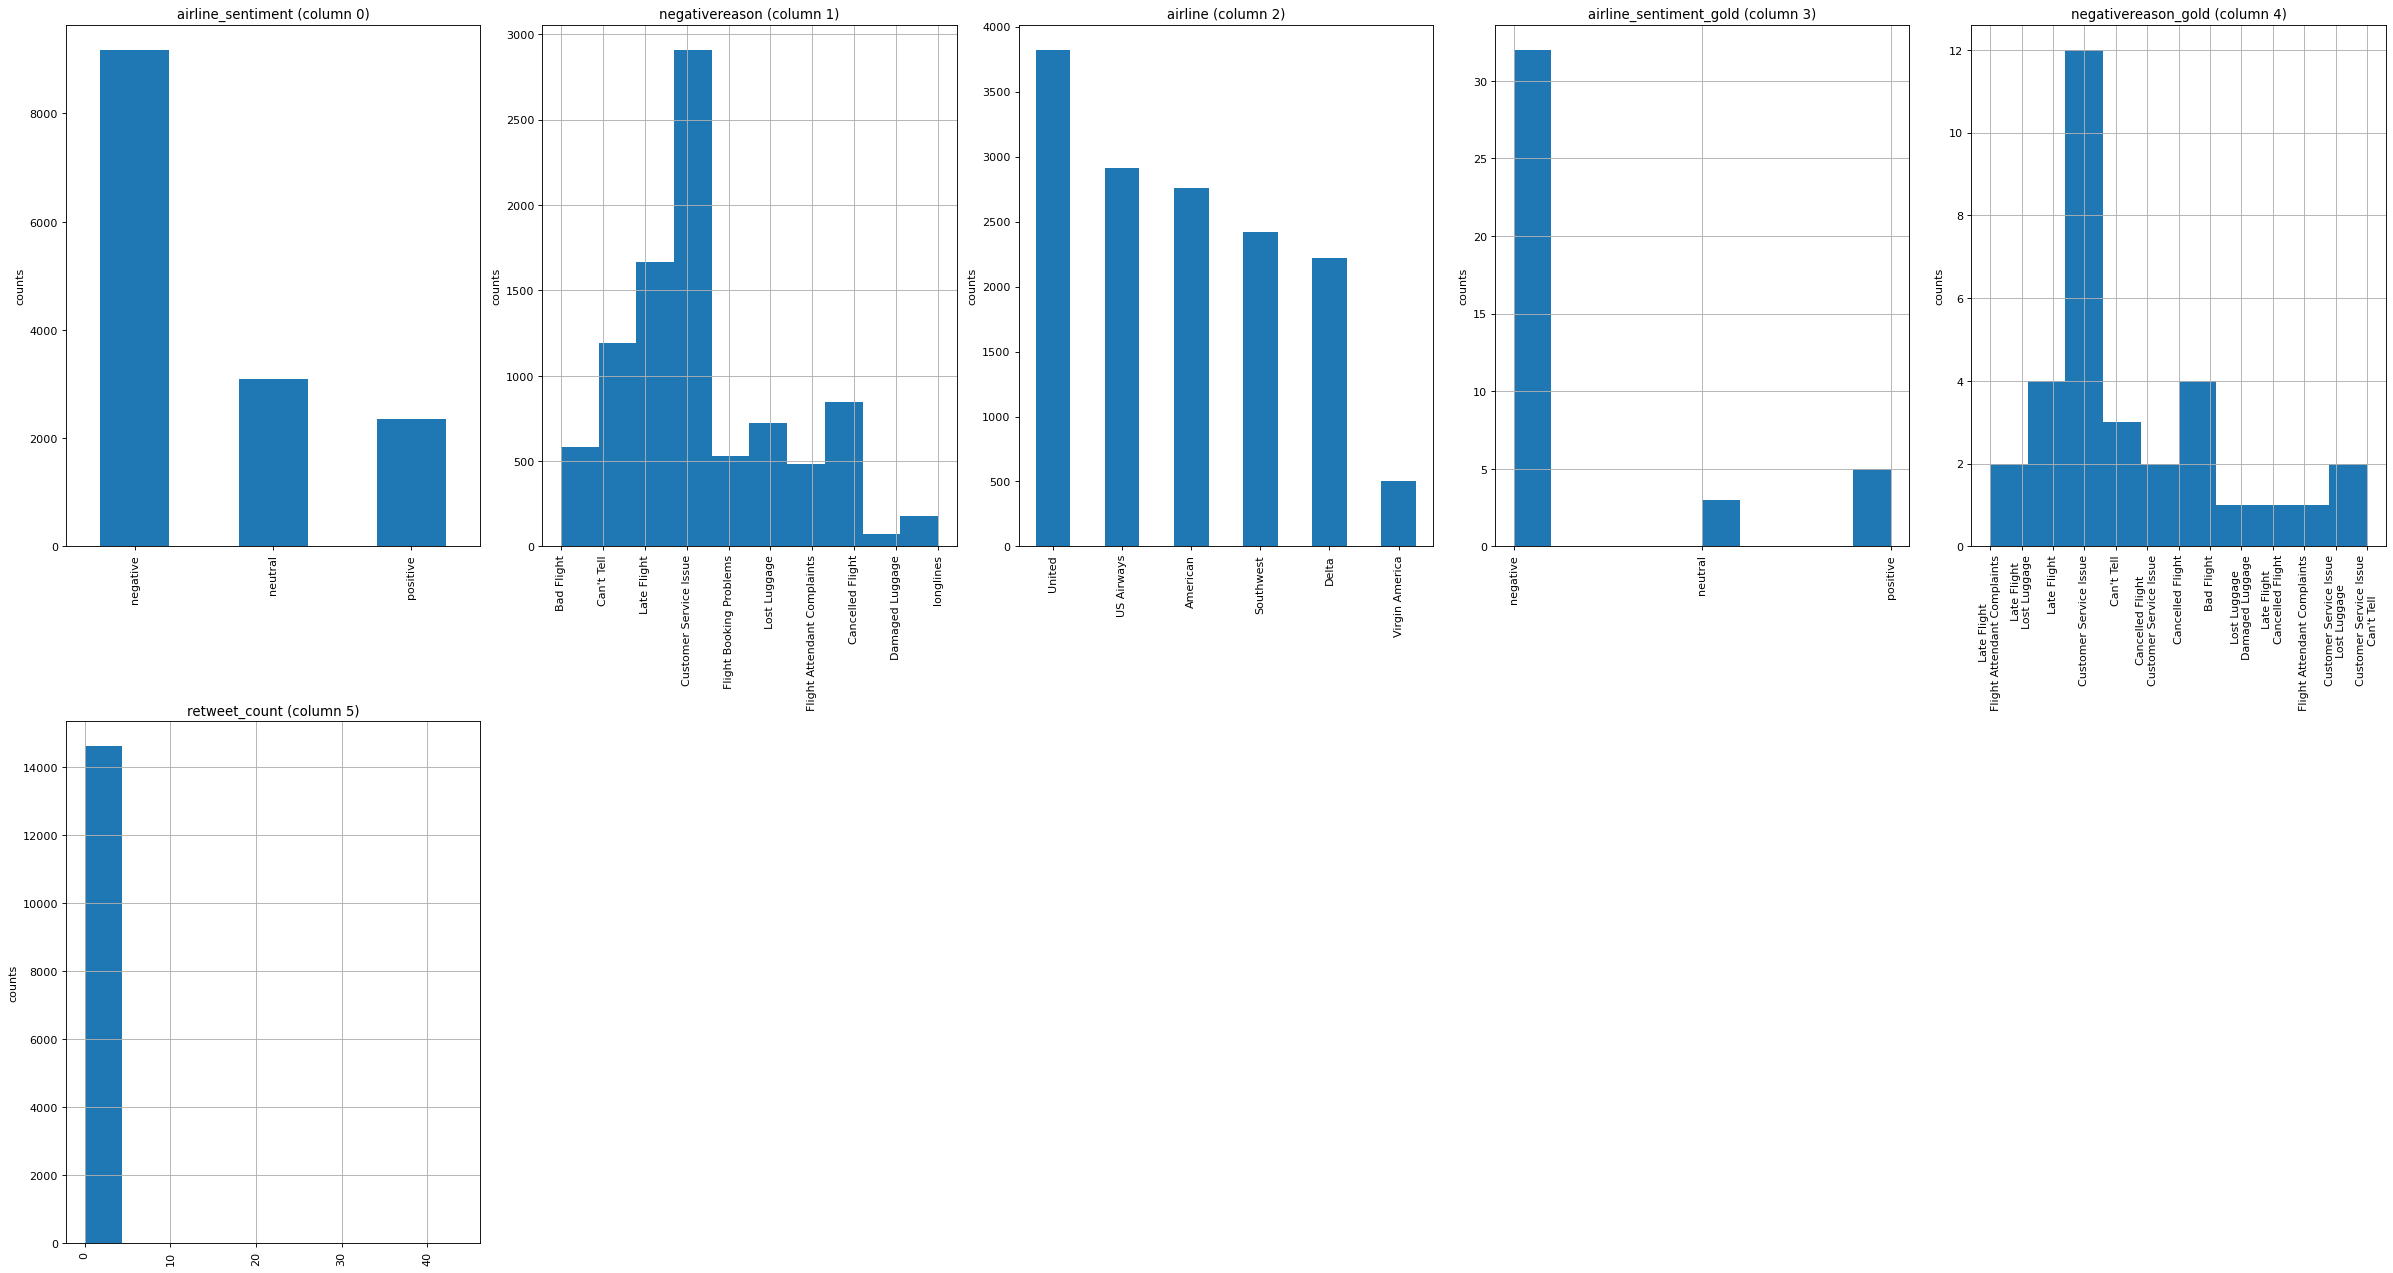

In [17]:
''' distribution graph '''
plot_per_column_dist(df, 10, 5)